In [2]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os


# Получаем абсолютный путь к директории, где находится ноутбук
notebook_dir = os.path.abspath('')
# Добавляем путь к родительской директории в sys.path
if notebook_dir not in sys.path:
    sys.path.append(notebook_dir)
    
#from helper.functionanalyzer import FunctionAnalyzer # Пользовательская функция для анализа функций


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

if sys.version_info <= (3, 12):
    try:
        import nvmath
    except ImportError:
        print("Модуль nvmath не установлен для Python <= 3.12")
else:
    print(f"Модуль nvmath требует Python <= 3.12. Текущая версия: {sys.version_info.major}.{sys.version_info.minor}")



Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Модуль nvmath требует Python <= 3.12. Текущая версия: 3.13


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [6]:
import sys
import os
from pathlib import Path

# Получаем абсолютный путь к директории, где находится ноутбук
# Пробуем несколько способов определения пути
notebook_dir = None

# Способ 1: Текущая рабочая директория
cwd = os.getcwd()
if os.path.exists(os.path.join(cwd, 'helper', 'functionanalyzer.py')):
    notebook_dir = cwd

# Способ 2: Если не нашли, пробуем путь относительно известной структуры
if notebook_dir is None:
    # Путь к директории ноутбука (предполагаем, что ноутбук в skillfactory/Блок 6/...)
    possible_paths = [
        r'c:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-8. Алгоритмы на основе деревьев решений',
        os.path.join(os.path.expanduser('~'), 'OneDrive', 'IDE', 'skillfactory', 'Блок 6', 'MATH&ML-8. Алгоритмы на основе деревьев решений'),
    ]
    for path in possible_paths:
        if os.path.exists(os.path.join(path, 'helper', 'functionanalyzer.py')):
            notebook_dir = path
            break

# Способ 3: Если все еще не нашли, используем текущую директорию
if notebook_dir is None:
    notebook_dir = cwd
    print(f"Предупреждение: Используется текущая рабочая директория: {notebook_dir}")
    print(f"Проверьте, что папка 'helper' находится в этой директории")

# Добавляем путь к директории ноутбука в sys.path
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)

print(f"Директория ноутбука: {notebook_dir}")
print(f"Текущая рабочая директория: {os.getcwd()}")
print(f"Проверка наличия helper: {os.path.exists(os.path.join(notebook_dir, 'helper', 'functionanalyzer.py'))}")
print(f"Проверка наличия data: {os.path.exists(os.path.join(notebook_dir, 'data'))}")

Директория ноутбука: c:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-8. Алгоритмы на основе деревьев решений
Текущая рабочая директория: c:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-8. Алгоритмы на основе деревьев решений
Проверка наличия helper: True
Проверка наличия data: True


In [10]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [11]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [12]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [13]:
voice_data.isnull().sum().sum()

0

In [15]:
# Формируем обучающую и тестовую выборки
X = voice_data.drop('label', axis=1)
y = voice_data['label']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


## Задание 7.1
4 points possible (graded)

Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. На основе какого фактора будет построено решающее правило в корневой вершине?



Глубина дерева: 1


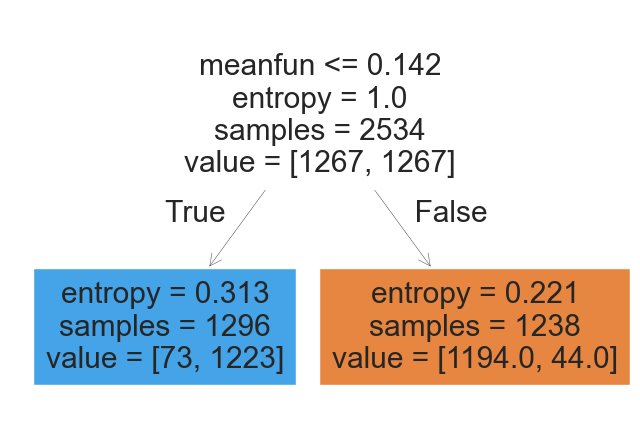

In [16]:
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности (энтропия Шеннона)
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)

# Вычисляем фактическую глубину дерева
tree_depth = dt.tree_.max_depth
print(f'\nГлубина дерева: {tree_depth}')

tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

In [17]:
# Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.
quantity_sample = X_train[X_train['meanfun'] <= 0.142]
print(f'Количество наблюдений по критерию 1 (meanfun) в обучающей выборке: {len(quantity_sample)}')
print(f'Количество наблюдений в обучающей выборке: {len(X_train)}')
print(f'Процент наблюдений по критерию 1 (meanfun) в обучающей выборке: {len(quantity_sample) / len(X_train) * 100:.1f}%')

Количество наблюдений по критерию 1 (meanfun) в обучающей выборке: 1295
Количество наблюдений в обучающей выборке: 2534
Процент наблюдений по критерию 1 (meanfun) в обучающей выборке: 51.1%


## 4. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [19]:
##  Оцените качество модели с помощью метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.
predictions = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'Accuracy на тестовой выборке: {accuracy:.3f}')

Accuracy на тестовой выборке: 0.956


## Задание 7.2
3 points possible (graded)
Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений:


Глубина дерева: 2


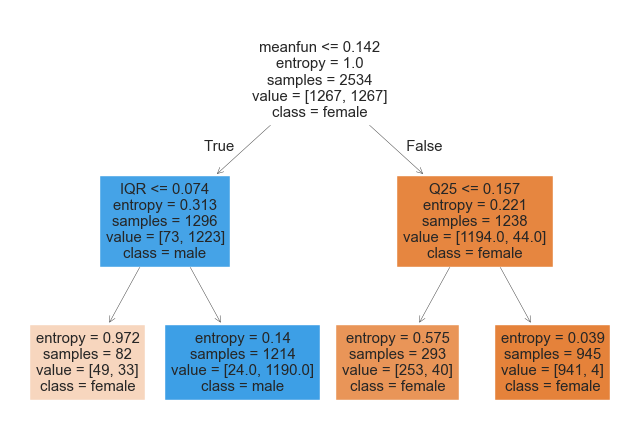

In [22]:
dt = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности (энтропия Шеннона)
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)

# Вычисляем фактическую глубину дерева
tree_depth = dt.tree_.max_depth
print(f'\nГлубина дерева: {tree_depth}')

tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_
);

In [23]:
##  Оцените качество модели с помощью метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.
predictions = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'Accuracy на тестовой выборке: {accuracy:.3f}')

Accuracy на тестовой выборке: 0.962


## Задание 7.3

4 points possible (graded)

Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.

1. Чему равна глубина полученного дерева решения? Напомним, что глубину дерева можно узнать с помощью метода get_depth().


Глубина дерева: 12


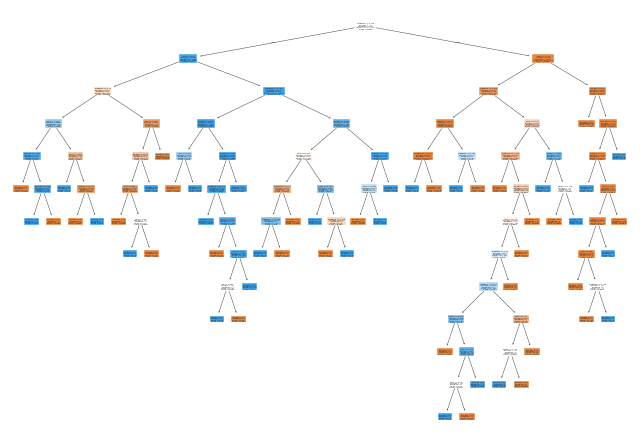

In [25]:
dt = tree.DecisionTreeClassifier(
    #max_depth=2, #глубина
    criterion='entropy', #критерий информативности (энтропия Шеннона)
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)

# Вычисляем фактическую глубину дерева
tree_depth = dt.get_depth()
print(f'\nГлубина дерева: {tree_depth}')

tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_
);

2. Чему равно количество листьев в полученном дереве решений? Напомним, что количество листьев можно узнать с помощью метода get_n_leaves().

In [31]:
dt_tree_leaves = dt.get_n_leaves()
print(f'\nКоличество листьев в дереве: {dt_tree_leaves}')



Количество листьев в дереве: 54


## 3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [32]:
##  Оцените качество модели с помощью метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.
predictions_test = dt.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)
print(f'Accuracy на тестовой выборке: {accuracy_test:.3f}')

predictions_train = dt.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train, predictions_train)
print(f'Accuracy на обучающей выборке: {accuracy_train:.3f}')



Accuracy на тестовой выборке: 0.973
Accuracy на обучающей выборке: 1.000


## Задание 7.4 

5 points possible (graded)

Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

Задана следующая сетка параметров:

In [34]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

В качестве кросс-валидатора будем использовать k-fold-валидатор со стратификацией (StratifiedKFold):

In [35]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

## 
С помощью Grid SearchCV из модуля model_selection библиотеки sklearn переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр random_state для дерева решений установите равным 0. В качестве метрики качества (параметр scoring) используйте accuracy.

1. Какой критерий информативности использует наилучшая модель?

In [36]:
# Создаём базовую модель дерева решений с random_state=0
# (random_state должен быть в estimator, а не в GridSearchCV)
base_dt = tree.DecisionTreeClassifier(random_state=0)

# Создаём объект GridSearchCV
grid_search = model_selection.GridSearchCV(
    estimator=base_dt,  # базовая модель
    param_grid=param_grid,  # сетка параметров
    cv=cv,  # метод кросс-валидации (StratifiedKFold)
    scoring='accuracy',  # метрика качества
    n_jobs=-1  # использовать все доступные ядра процессора
)

# Обучаем GridSearchCV на обучающей выборке
print("Начинаем поиск оптимальных гиперпараметров...")
grid_search.fit(X_train, y_train)

# Выводим результаты
print(f"\nЛучший score на кросс-валидации: {grid_search.best_score_:.4f}")
print(f"\nЛучшие параметры:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nЛучшая модель:")
print(grid_search.best_estimator_)

# Ответ на вопрос 1: Какой критерий информативности использует наилучшая модель?
print(f"\nОтвет на вопрос 1:")
print(f"Критерий информативности наилучшей модели: {grid_search.best_params_['criterion']}")

Начинаем поиск оптимальных гиперпараметров...

Лучший score на кросс-валидации: 0.9657

Лучшие параметры:
  criterion: gini
  max_depth: 7
  min_samples_split: 3

Лучшая модель:
DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=0)

Ответ на вопрос 1:
Критерий информативности наилучшей модели: gini


4. С помощью наилучшей модели сделайте предсказание для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

accuracy на обучающей выборке:
  нет ответа 
 
accuracy на тестовой выборке:

In [37]:
# Используем наилучшую модель из GridSearchCV для предсказаний
# Лучшая модель доступна через grid_search.best_estimator_

# Предсказания на обучающей выборке
predictions_train = grid_search.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train, predictions_train)

# Предсказания на тестовой выборке
predictions_test = grid_search.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)

# Выводим результаты с округлением до 3 знаков после запятой
print(f'Accuracy на обучающей выборке: {accuracy_train:.3f}')
print(f'Accuracy на тестовой выборке: {accuracy_test:.3f}')

Accuracy на обучающей выборке: 0.996
Accuracy на тестовой выборке: 0.970


## Задание 7.5

1 point possible (graded)

Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.

Выделите топ-3 наиболее важных факторов, участвующих в построении дерева решений:

Важность всех признаков (отсортировано по убыванию):
 feature  importance
 meanfun    0.861347
     IQR    0.056810
     sfm    0.018004
  minfun    0.014153
 dfrange    0.006888
    kurt    0.006544
    mode    0.006047
centroid    0.005985
    skew    0.004196
      sd    0.004120
     Q75    0.003614
  median    0.003247
meanfreq    0.002571
  mindom    0.001534
     Q25    0.001432
 modindx    0.001388
 meandom    0.001200
  sp.ent    0.000919
  maxfun    0.000000
  maxdom    0.000000


Топ-3 наиболее важных факторов:
meanfun: 0.8613
IQR: 0.0568
sfm: 0.0180


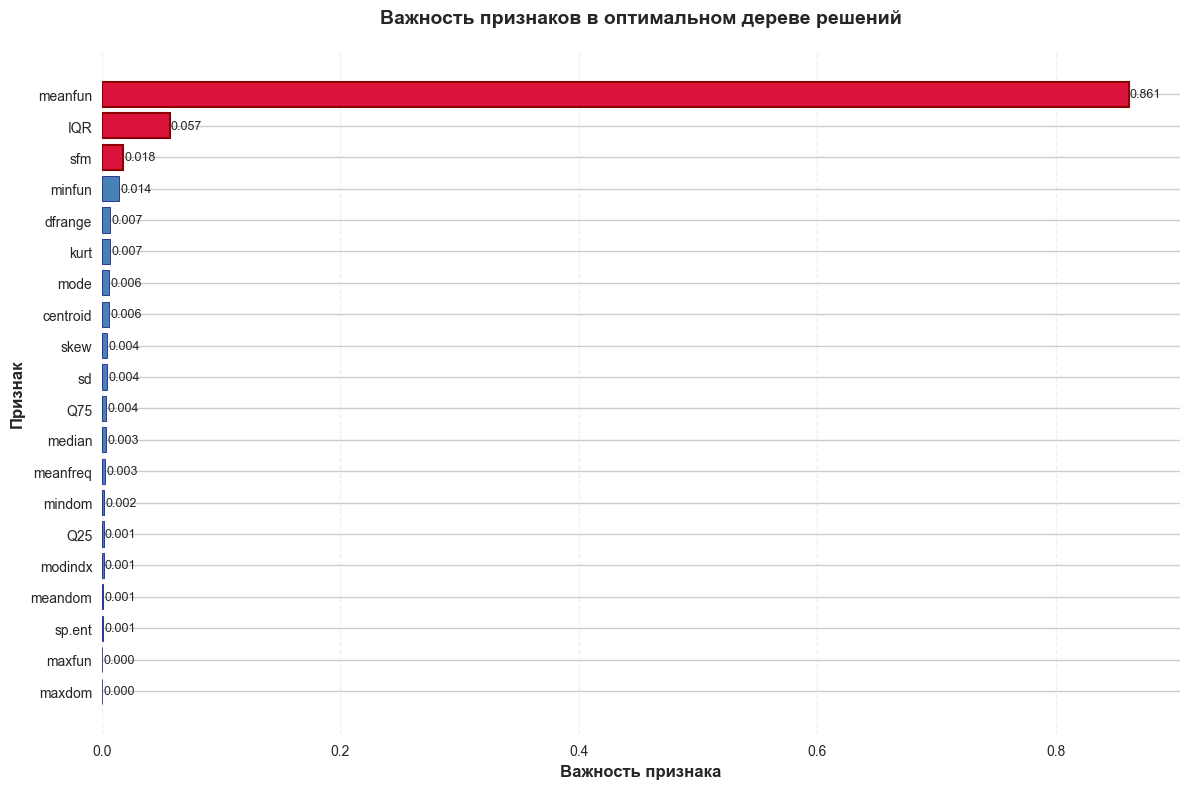

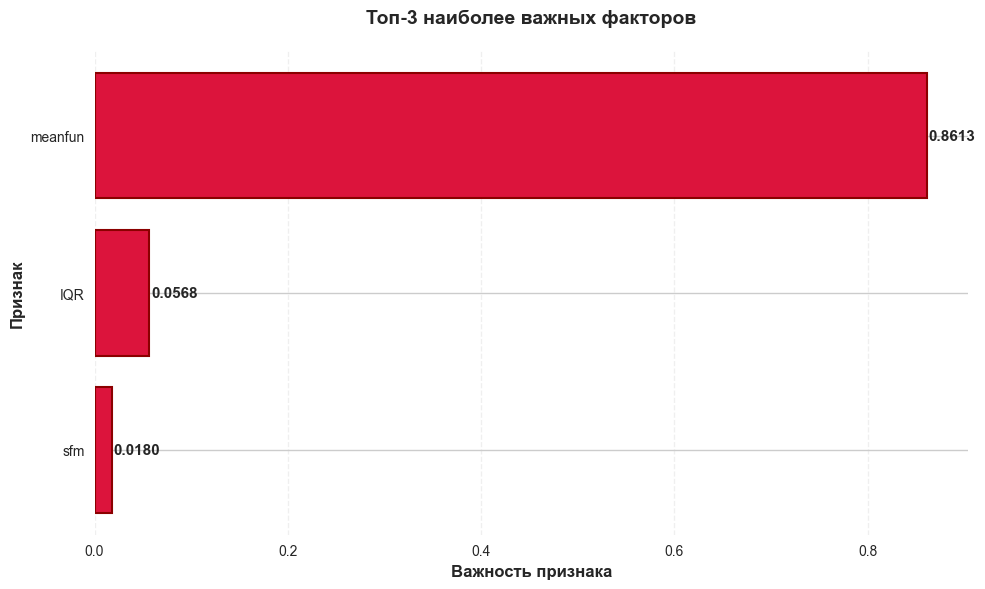


Ответ: Топ-3 наиболее важных факторов:
1. meanfun (важность: 0.8613)
2. IQR (важность: 0.0568)
3. sfm (важность: 0.0180)


In [38]:
# Получаем важность признаков из оптимальной модели
best_model = grid_search.best_estimator_
feature_importance = best_model.feature_importances_

# Создаём DataFrame для удобной работы с данными
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

# Сортируем по убыванию важности
importance_df = importance_df.sort_values('importance', ascending=False)

# Выводим все важности признаков
print("Важность всех признаков (отсортировано по убыванию):")
print(importance_df.to_string(index=False))
print("\n" + "="*60)

# Выделяем топ-3 наиболее важных факторов
top_3_features = importance_df.head(3)
print("\nТоп-3 наиболее важных факторов:")
for idx, row in top_3_features.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Визуализация важности признаков в виде столбчатой диаграммы
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(importance_df)), importance_df['importance'], 
                color='steelblue', edgecolor='navy', linewidth=0.5)
plt.yticks(range(len(importance_df)), importance_df['feature'])
plt.xlabel('Важность признака', fontsize=12, fontweight='bold')
plt.ylabel('Признак', fontsize=12, fontweight='bold')
plt.title('Важность признаков в оптимальном дереве решений', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы самый важный был сверху

# Выделяем топ-3 наиболее важных факторов другим цветом
for i in range(3):
    bars[i].set_color('crimson')
    bars[i].set_edgecolor('darkred')
    bars[i].set_linewidth(1.5)

# Добавляем значения на столбцы
for i, (idx, row) in enumerate(importance_df.iterrows()):
    plt.text(row['importance'] + 0.001, i, f'{row["importance"]:.3f}', 
             va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Дополнительная визуализация только топ-3 факторов
plt.figure(figsize=(10, 6))
top_3_sorted = top_3_features.sort_values('importance', ascending=True)
bars = plt.barh(range(len(top_3_sorted)), top_3_sorted['importance'], 
                color='crimson', edgecolor='darkred', linewidth=1.5)
plt.yticks(range(len(top_3_sorted)), top_3_sorted['feature'])
plt.xlabel('Важность признака', fontsize=12, fontweight='bold')
plt.ylabel('Признак', fontsize=12, fontweight='bold')
plt.title('Топ-3 наиболее важных факторов', 
          fontsize=14, fontweight='bold', pad=20)

# Добавляем значения на столбцы
for i, (idx, row) in enumerate(top_3_sorted.iterrows()):
    plt.text(row['importance'] + 0.002, i, f'{row["importance"]:.4f}', 
             va='center', fontsize=11, fontweight='bold')

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Ответ: Топ-3 наиболее важных факторов:")
for i, (idx, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"{i}. {row['feature']} (важность: {row['importance']:.4f})")
